                                                              PREDICTING THE HEART FAILURE DISEASE 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

plt.style.use('dark_background')

In [ ]:
 
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [ ]:
# Checking for null values
null_values = df.isnull().sum()
null_values


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
def identify_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)
    return outliers

# List of numerical columns
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                     'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Identify outliers
outliers = identify_outliers(df, numerical_columns)
print(f'Number of outliers: {outliers.sum()}')


Number of outliers: 1172


In [ ]:
# Remove outliers
df1 = df[~outliers]
print(f'Number of remaining data points: {df1.shape[0]}')


Number of remaining data points: 3828


In [ ]:
df1.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.104974,0.071669,-0.056398,0.089489,0.128716,-0.059473,0.216255,0.033077,0.059985,0.003748,-0.218728,0.267774
anaemia,0.104974,1.000000,-0.146184,-0.006874,-0.025161,0.022389,-0.036136,0.009728,0.043724,-0.072807,-0.151836,-0.086001,0.084261
creatinine_phosphokinase,0.071669,-0.146184,1.000000,-0.008781,-0.082625,0.030108,0.048872,0.099770,-0.089955,-0.032859,-0.016592,0.068450,0.075943
diabetes,-0.056398,-0.006874,-0.008781,1.000000,-0.016362,0.036962,0.036972,0.008483,-0.149893,-0.169369,-0.139981,0.056268,-0.030115
ejection_fraction,0.089489,-0.025161,-0.082625,-0.016362,1.000000,0.041973,0.105509,-0.248118,0.206272,-0.092974,-0.037785,0.080381,-0.317678
high_blood_pressure,0.128716,0.022389,0.030108,0.036962,0.041973,1.000000,0.057409,-0.032277,0.067607,-0.080502,-0.047996,-0.222891,0.129055
platelets,-0.059473,-0.036136,0.048872,0.036972,0.105509,0.057409,1.000000,-0.089229,-0.000582,-0.086934,0.053758,0.037581,-0.056803
serum_creatinine,0.216255,0.009728,0.099770,0.008483,-0.248118,-0.032277,-0.089229,1.000000,-0.256050,0.145550,0.000503,-0.113133,0.353817
serum_sodium,0.033077,0.043724,-0.089955,-0.149893,0.206272,0.067607,-0.000582,-0.256050,1.000000,-0.089525,0.021509,0.002016,-0.120584
sex,0.059985,-0.072807,-0.032859,-0.169369,-0.092974,-0.080502,-0.086934,0.145550,-0.089525,1.000000,0.480355,0.018908,0.091564


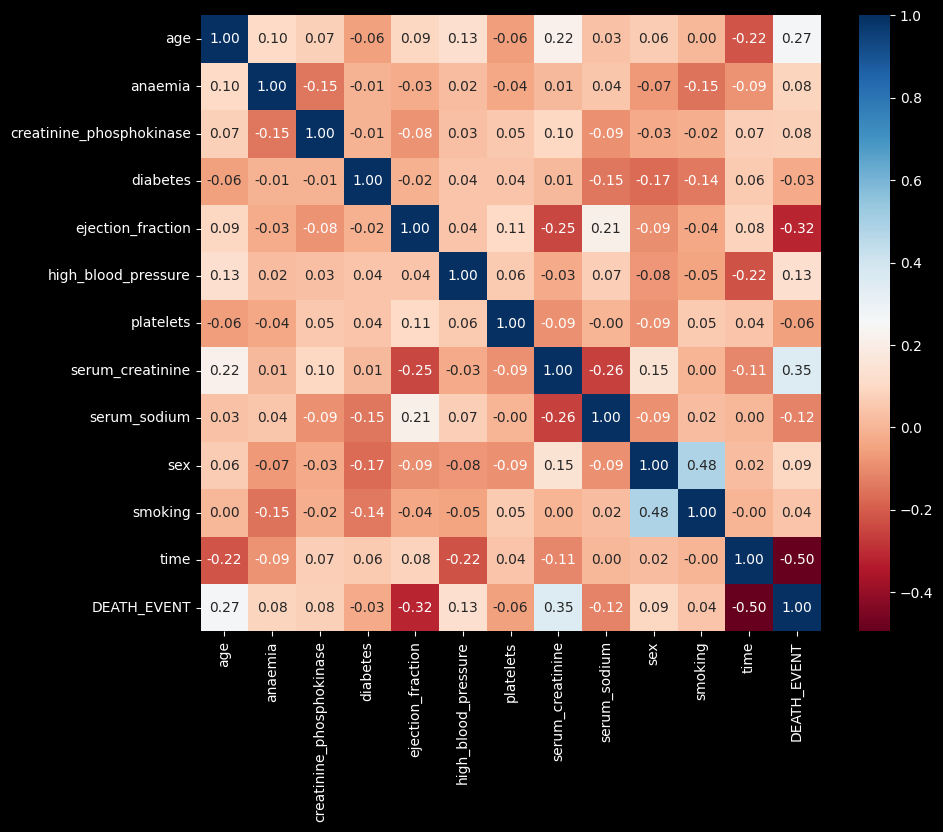

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap='RdBu', cbar=True)

# Show the plot
plt.show()

In [ ]:
death_counts = df1.groupby("DEATH_EVENT")["DEATH_EVENT"].count().reset_index(name="counts")

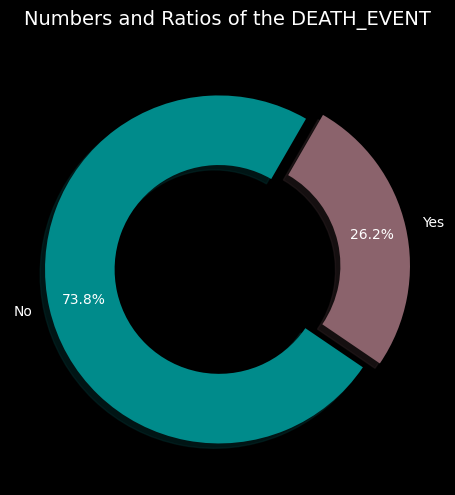

In [ ]:
plt.figure(figsize=(8, 5))
plt.suptitle("Numbers and Ratios of the DEATH_EVENT", fontsize=14)

# Create the pie chart in the center
plt.pie(x=death_counts['counts'], shadow=True, autopct="%.1f%%", pctdistance=0.8, startangle=60,
        labels=['No', 'Yes'], wedgeprops=dict(width=0.4), explode=[0.05, 0.05], colors=["#008b8b", "#8b636c"])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

The below Graph provides the information about the histograms of the columns

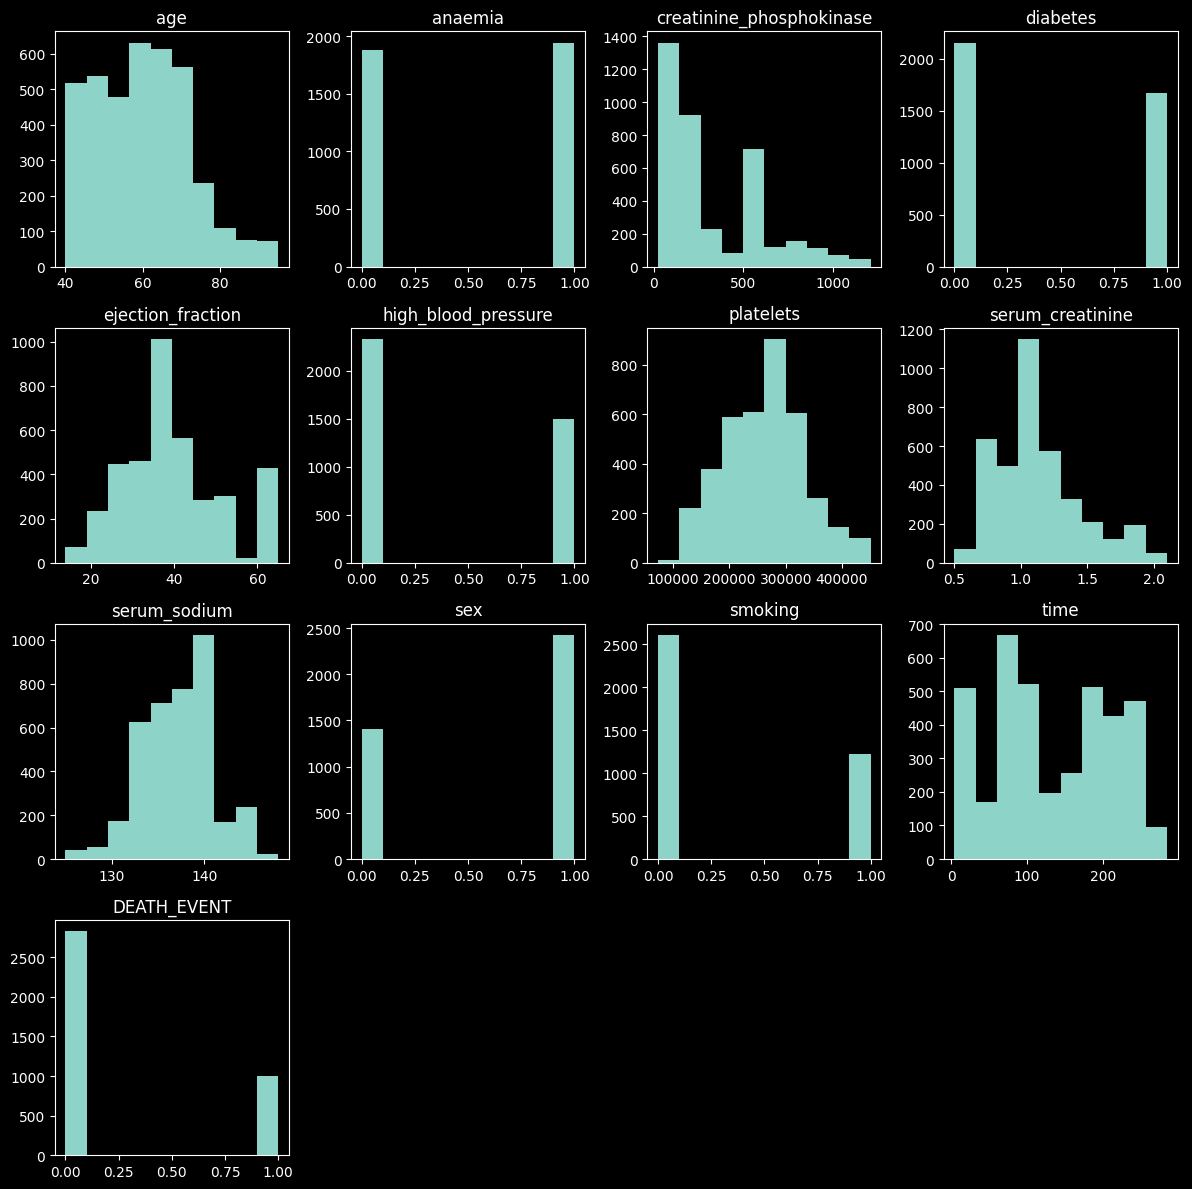

In [ ]:
import matplotlib.pyplot as plt

# Histograms for numerical features
df1.hist(figsize=(12, 12), grid=False)
plt.tight_layout()
plt.show()



This Graph represents the count plot of each Colums

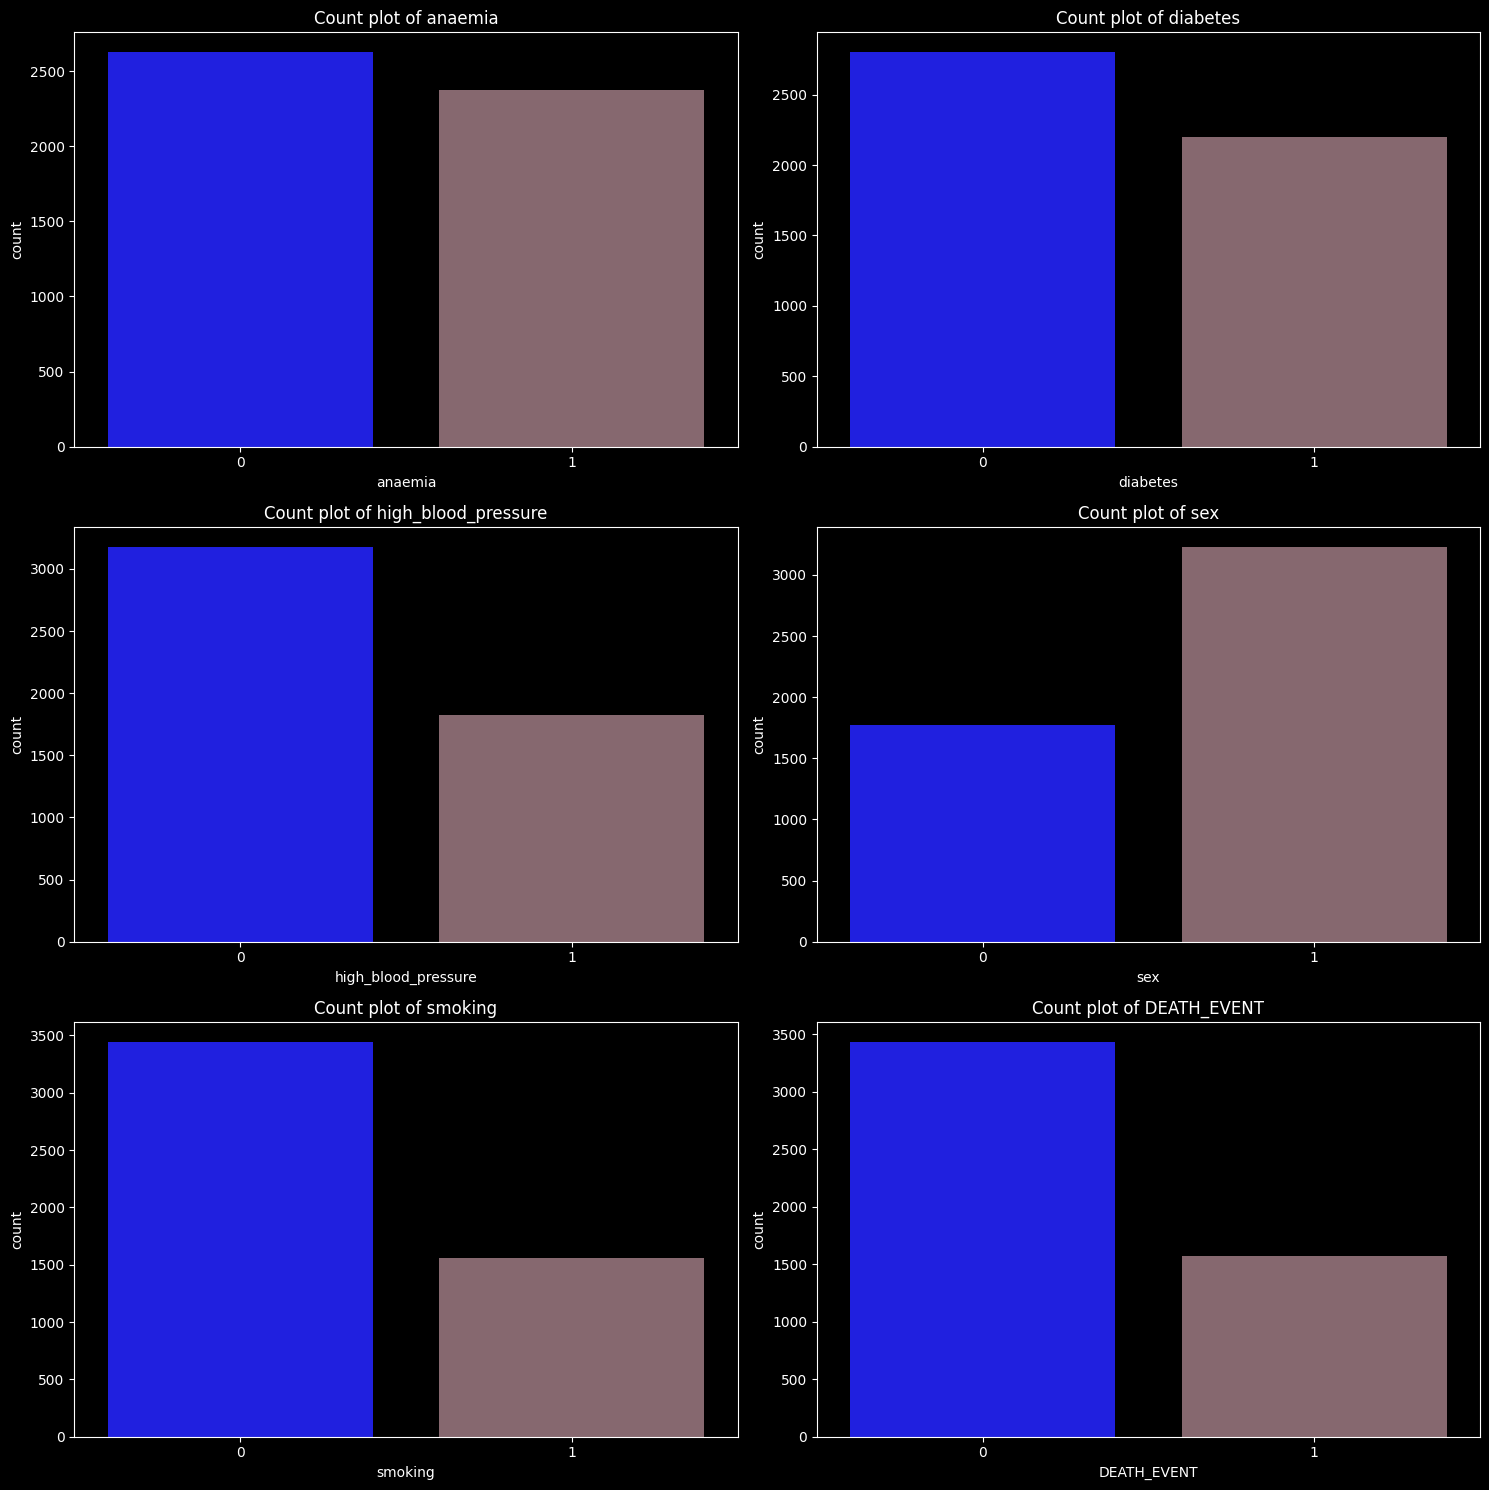

In [ ]:
custom_palette = ["#0000FF", "#8b636c"]

# Count plots for categorical features
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Loop through each feature and plot
for ax, feature in zip(axes.flatten(), categorical_features):
    sns.countplot(x=feature, hue=feature, data=df, palette=custom_palette, ax=ax, legend=False)
    ax.set_title(f'Count plot of {feature}')

# Adjust layout to fit plots nicely
plt.tight_layout()
plt.show()

 Implementing LOGISTIC REGRESSION


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
# Features and target variable
X = df1.drop('DEATH_EVENT', axis=1)
y = df1['DEATH_EVENT']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Building the model
model = LogisticRegression(C=1, penalty='l2',solver='liblinear')
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.8629242819843342

In [ ]:
# Making predictions
y_pred = model.predict(X_test)


Accuracy: 0.8459530026109661
Confusion Matrix:
[[539  24]
 [ 94 109]]
Accuracy: 0.8459530026109661
Precision: 0.8195488721804511
Recall: 0.5369458128078818
F1 Score: 0.6488095238095238
Confusion Matrix:
 [[539  24]
 [ 94 109]]
ROC AUC Score: 0.7471585191925731
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       563
           1       0.82      0.54      0.65       203

    accuracy                           0.85       766
   macro avg       0.84      0.75      0.78       766
weighted avg       0.84      0.85      0.83       766

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       563
           1       0.82      0.54      0.65       203

    accuracy                           0.85       766
   macro avg       0.84      0.75      0.78       766
weighted avg       0.84      0.85      0.83       766



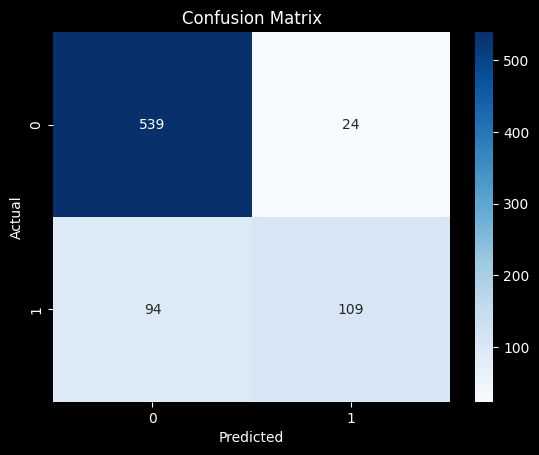

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
accuracy
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_rep)

# Classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
